Machine parameters: k=8, n=200, l=255
Using random_walk update rule.
Synchronization = 100% / Updates = 275
Time: 6.220401287078857 seconds.
Tacts: 275


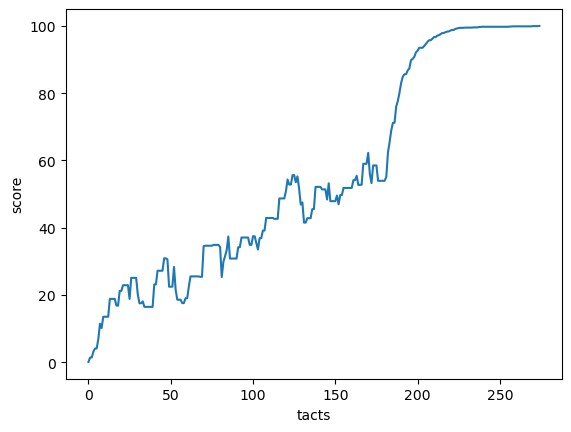

In [93]:
from machine import TPM
import matplotlib.pyplot as plt
import numpy as np
import time
import sys
from sklearn.metrics import accuracy_score


#Machine parameters
k = 8
n = 200
l = 255

#Rule
update_rules = ['hebbian', 'anti_hebbian', 'random_walk']
update_rule = update_rules[2]

print(f"Machine parameters: k={str(k)}, n={str(n)}, l={str(l)}")
print(f"Using {update_rule} update rule.")
Alice = TPM(k, n, l)
Bob = TPM(k, n, l)

#Random number generator
def random():
	# return np.random.randint(-1, 1+1, [k, n])  # gen bits
	return np.random.randint(-l, l + 1, [k, n])  # gen bytes (l=255)


sync = False
tacts = 0

start_time = time.time()
sync_history = []

while not sync:

	X = random() # Create random vector of dimensions [k, n]

	tauA = Alice(X) # Get output from Alice
	tauB = Bob(X) # Get output from Bob

	Alice.update(tauB, update_rule) # Update Alice with Bob's output
	Bob.update(tauA, update_rule) # Update Bob with Alice's output


	tacts += 1

	score = 100 * accuracy_score(Alice.W.flatten(), Bob.W.flatten())

	sync_history.append(score)

	sys.stdout.write(f'\rSynchronization = {str(int(score))}% / Updates = {str(tacts)}')
	if score == 100:
		sync = True

end_time = time.time()
# print('\n///////////////////')
# print(Alice.W)
# print('///////////////////')
# print(Bob.W)
# print('///////////////////')

print (f"\nTime: {str(end_time - start_time)} seconds.\nTacts: {str(tacts)}")

plt.plot(sync_history)
plt.xlabel('tacts')
plt.ylabel('score')
plt.show()

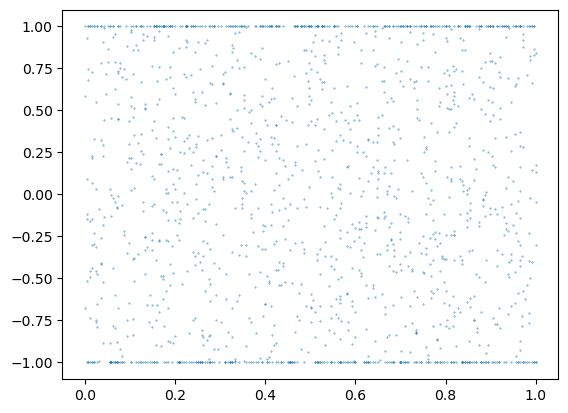

In [94]:
import matplotlib.pyplot as plt

x_train = np.array(list(np.random.bytes(len(Alice.W.flatten()))))/255
y_train = Alice.W.flatten()/255

plt.scatter(x_train, y_train, s=0.1)

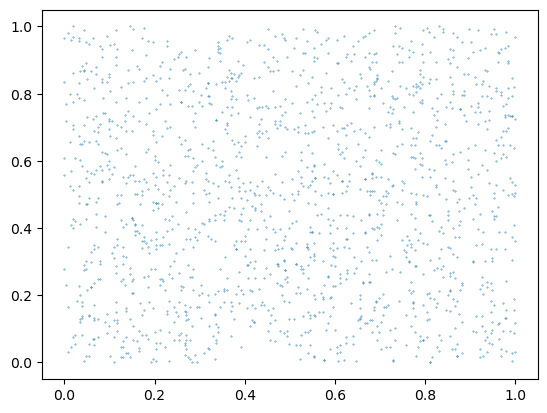

In [95]:
x_train = np.array(list(np.random.bytes(len(Alice.W.flatten()))))/255
y_train = np.array(list(np.random.bytes(len(Alice.W.flatten()))))/255
plt.scatter(x_train, y_train, s=0.1)

<AxesSubplot:ylabel='Count'>

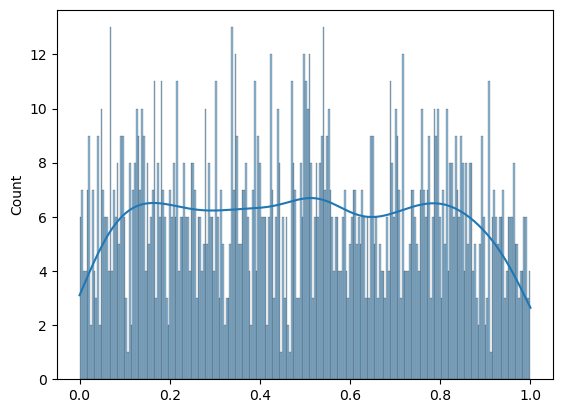

In [96]:
import seaborn as sns
sns.histplot(y_train, bins=len(np.unique(y_train)), kde=True)

<AxesSubplot:ylabel='Count'>

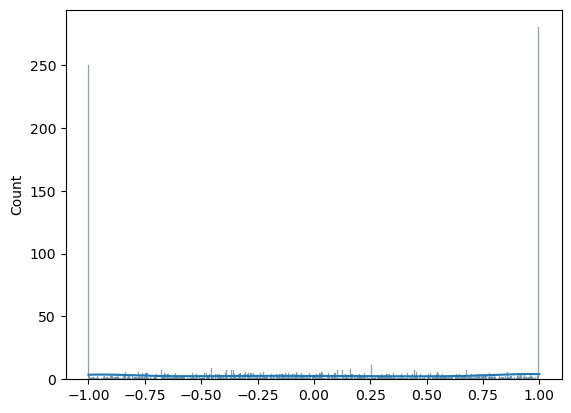

In [97]:
y_train = Alice.W.flatten()/255
sns.histplot(y_train, bins=len(np.unique(y_train)), kde=True)

<AxesSubplot:ylabel='Count'>

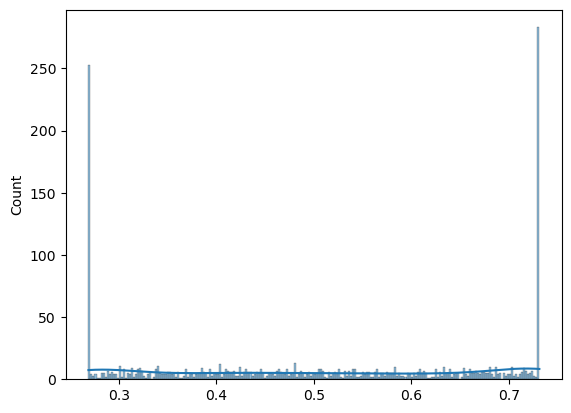

In [107]:
import math

y_train = Alice.W.flatten()/255
sigm = np.vectorize(lambda x: 1 / (1 + math.exp(-x)))
y_train = sigm(y_train)
sns.histplot(y_train, bins=len(np.unique(y_train))//2, kde=True)

In [104]:
y.shape

(1072,)

<AxesSubplot:ylabel='Count'>

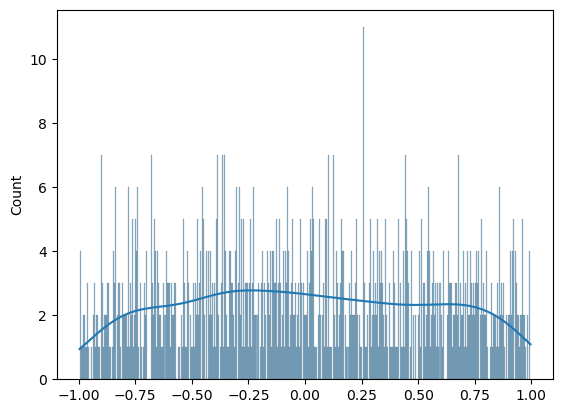

In [112]:
y_train = Alice.W.flatten()/255
index = np.argwhere(y_train==-1.)
y = np.delete(y_train, index)
index = np.argwhere(y==1.)
y = np.delete(y, index)
sns.histplot(y, bins=len(np.unique(y)), kde=True)

<AxesSubplot:ylabel='Count'>

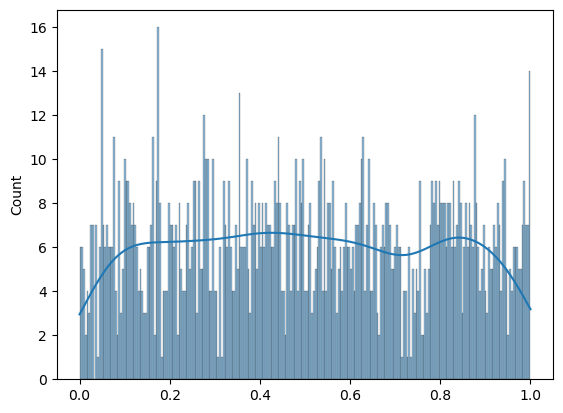

In [110]:
y_rand = np.array(list(np.random.bytes(len(Alice.W.flatten()))))/255
sns.histplot(y_rand, bins=len(np.unique(y_rand)), kde=True)

<AxesSubplot:ylabel='Count'>

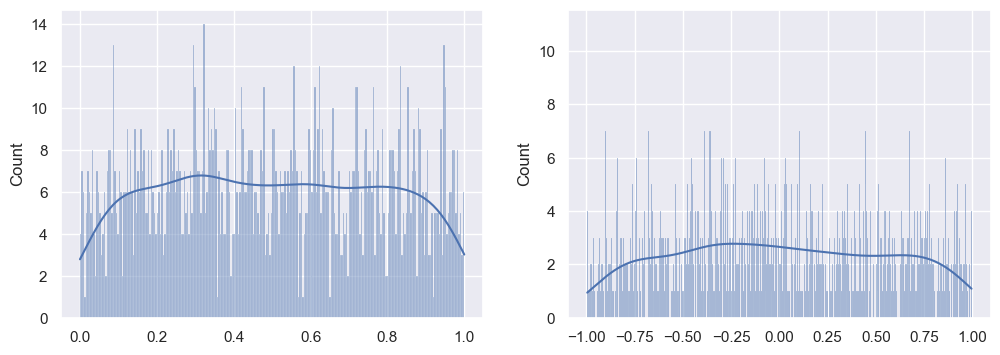

In [126]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.set()
sns.histplot(y_rand, bins=len(np.unique(y_rand)), kde=True, ax=axes[0])
sns.histplot(y, bins=len(np.unique(y)), kde=True, ax=axes[1])